In [11]:
from transformers import BertTokenizer, GPT2Tokenizer
import pandas as pd
import numpy as np

In [5]:
directory = "/home/test/nbs/cberrio/data/XLNet-data/"
train = pd.read_csv(directory + "train.csv", header=None)
test = pd.read_csv(directory + "test.csv", header=None)

train = pd.DataFrame({
    'id':range(len(train)),
    'label':train[0],
    'mark':['a']*train.shape[0],
    'text': train[1].replace(r'\n', ' ', regex=True)
})

test = pd.DataFrame({
    'id':range(len(test)),
    'label':test[0],
    'mark':['a']*test.shape[0],
    'text': test[1].replace(r'\n', ' ', regex=True)
})

train.columns = ["index", "label", "mark", "tweet"]
test.columns =  ["index", "label", "mark", "tweet"]

Load CoLA dataset

In [229]:
directory = "/home/test/nbs/cberrio/data/CoLA/"

In [261]:
directory = "/home/test/nbs/cberrio/data/SST2/"

In [278]:
train = pd.read_csv(directory+"train.tsv", sep = "\t")

In [280]:
train_sentences = train['sentence'].values

In [27]:
train_sentences = train.tweet.values
test_sentences = test.tweet.values

In [281]:
train_sentences_split = [sent.split(' ') for sent in train_sentences]

In [282]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [283]:
train_sentences_split_flatten = flatten(train_sentences_split)

In [284]:
train_sentences_split_flatten_set = list(dict.fromkeys(train_sentences_split_flatten))

In [286]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=False)

In [287]:
#encoded_words = [tokenizer.encode(word,add_special_tokens=False) for word in train_sentences_split_flatten_set if not (word.startswith("https") or word.startswith("http") or word.startswith("@") or word.startswith("#"))]
encoded_words = [tokenizer.encode(word,add_special_tokens=False) for word in train_sentences_split_flatten_set]

In [288]:
encoded_words_length_bert = [len(encoded_word) for encoded_word in encoded_words]

In [289]:
encoded_words_length_np = np.array(encoded_words_length)

In [290]:
unique_elements_bert, counts_elements = np.unique(encoded_words_length_np, return_counts=True)

In [291]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2', do_lower_case=True)

In [292]:
encoded_words = [tokenizer.encode(word,add_special_tokens=False) for word in train_sentences_split_flatten_set]

In [293]:
encoded_words_length = [len(encoded_word) for encoded_word in encoded_words]

In [294]:
encoded_words_length_np = np.array(encoded_words_length)

In [295]:
unique_elements, counts_elements = np.unique(encoded_words_length_np, return_counts=True)

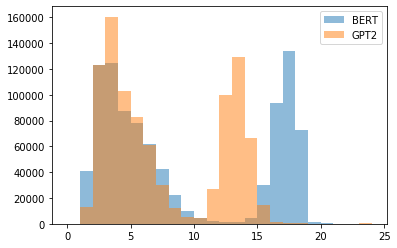

In [228]:
import matplotlib.pyplot as plt

plt.hist(encoded_words_length_bert, bins=unique_elements_bert[:25],label="BERT", alpha=0.5)
plt.hist(encoded_words_length, bins=unique_elements[:25],label="GPT2", alpha=0.5)
plt.legend(loc='upper right')
plt.show()

Filtering URLS:

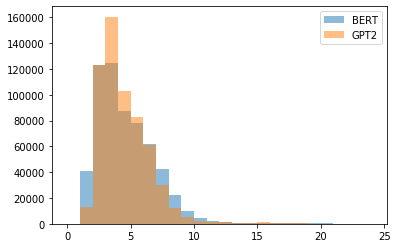

In [191]:
plt.hist(encoded_words_length_bert, bins=unique_elements_bert[:25],label="BERT", alpha=0.5)
plt.hist(encoded_words_length, bins=unique_elements[:25],label="GPT2",alpha=0.5)
plt.legend(loc='upper right')
plt.show()

Filtering users and hashtags:

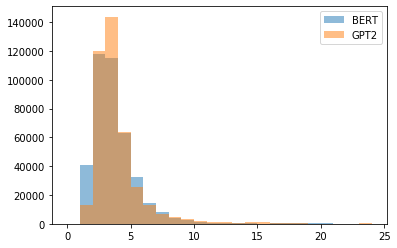

In [215]:
plt.hist(encoded_words_length_bert, bins=unique_elements_bert[:25],label="BERT", alpha=0.5)
plt.hist(encoded_words_length, bins=unique_elements[:25],label="GPT2",alpha=0.5)
plt.legend(loc='upper right')
plt.show()

Normal text (CoLA):

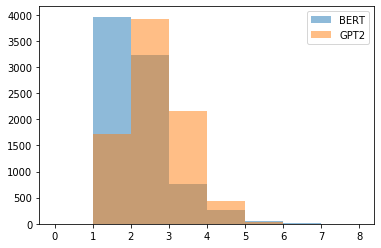

In [260]:
plt.hist(encoded_words_length_bert, bins=unique_elements_bert[:9],label="BERT", alpha=0.5)
plt.hist(encoded_words_length, bins=unique_elements[:9],label="GPT2", alpha=0.5)
plt.legend(loc='upper right')
plt.show()

Normal text (SST2):

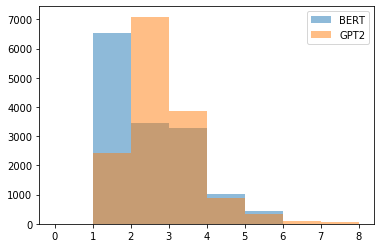

In [297]:
plt.hist(encoded_words_length_bert, bins=unique_elements_bert[:9],label="BERT", alpha=0.5)
plt.hist(encoded_words_length, bins=unique_elements[:9],label="GPT2", alpha=0.5)
plt.legend(loc='upper right')
plt.show()